In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=0ccb1b7897f1bab39b6cd54104d4f380


In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
# Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
# Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
# Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
# Append the city information into city_data list.
        city_data.append({"City": city.title(),
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | northam
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | dongling
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | boyolangu
Processing Record 11 of Set 1 | kungurtug
Processing Record 12 of Set 1 | pundaguitan
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | monticello
Processing Record 15 of Set 1 | alta floresta
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | ankang
Processing Record 20 of Set 1 | kutum
Processing Record 21 of Set 1 | malwan
City not found. Skipping...
Pro

Processing Record 38 of Set 4 | hofn
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | santo domingo
Processing Record 41 of Set 4 | tahoua
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | sabinas
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | padang
Processing Record 1 of Set 5 | mglin
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | hajdunanas
Processing Record 4 of Set 5 | santa rosa
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | yatou
Processing Record 8 of Set 5 | yining
Processing Record 9 of Set 5 | gardan diwal
City not found. Skipping...
Processing Record 10 of Set 5 | saldanha
P

Processing Record 24 of Set 8 | berdigestyakh
Processing Record 25 of Set 8 | covington
Processing Record 26 of Set 8 | husavik
Processing Record 27 of Set 8 | verkhnevilyuysk
Processing Record 28 of Set 8 | atar
Processing Record 29 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 30 of Set 8 | matamoros
Processing Record 31 of Set 8 | ust-tsilma
Processing Record 32 of Set 8 | maragogi
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | nagornyy
Processing Record 35 of Set 8 | lebu
Processing Record 36 of Set 8 | nageshwari
Processing Record 37 of Set 8 | khor
Processing Record 38 of Set 8 | arman
Processing Record 39 of Set 8 | yeppoon
Processing Record 40 of Set 8 | boralday
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | yar-sale
Processing Record 43 of Set 8 | russell
Processing Record 44 of Set 8 | chepareria
Processing Record 45 of Set 8 | metehara
City not found. Skipping...
Processing Record 46 of Set 8 | bourail
P

Processing Record 10 of Set 12 | santa cruz
Processing Record 11 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 12 | keokuk
Processing Record 13 of Set 12 | governador valadares
Processing Record 14 of Set 12 | adrar
Processing Record 15 of Set 12 | sola
Processing Record 16 of Set 12 | coquimbo
Processing Record 17 of Set 12 | oistins
Processing Record 18 of Set 12 | sergeyevka
Processing Record 19 of Set 12 | taoudenni
Processing Record 20 of Set 12 | ati
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | krasnyy yar
Processing Record 23 of Set 12 | neenah
Processing Record 24 of Set 12 | aketi
Processing Record 25 of Set 12 | kendari
Processing Record 26 of Set 12 | trincomalee
Processing Record 27 of Set 12 | marsa matruh
Processing Record 28 of Set 12 | ukiah
Processing Record 29 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 30 of Set 12 | tiruchchirappalli
Processing Record 31 of Set 12 | st

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Northam,51.0333,-4.2167,39.99,94,81,4.00,GB,2021-02-06 19:04:41
1,Torbay,47.6666,-52.7314,35.60,87,90,11.50,CA,2021-02-06 19:02:12
2,Chokurdakh,70.6333,147.9167,-20.16,87,61,8.48,RU,2021-02-06 19:02:06
3,Vaini,-21.2000,-175.2000,75.20,88,75,5.75,TO,2021-02-06 19:02:07
4,Dongling,41.8144,123.5758,12.20,85,0,4.47,CN,2021-02-06 19:04:42
5,Lasa,46.6166,10.7002,39.99,93,40,9.22,IT,2021-02-06 19:04:42
6,Alice Springs,-23.7000,133.8833,73.40,35,93,6.91,AU,2021-02-06 19:03:00
7,Boyolangu,-8.1181,111.8935,75.51,89,100,6.40,ID,2021-02-06 19:03:01
8,Kungurtug,50.5994,97.5228,0.05,86,85,2.01,RU,2021-02-06 19:04:42
9,Pundaguitan,6.3711,126.1689,79.79,82,100,8.84,PH,2021-02-06 19:04:42


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Northam,GB,2021-02-06 19:04:41,51.0333,-4.2167,39.99,94,81,4.00
1,Torbay,CA,2021-02-06 19:02:12,47.6666,-52.7314,35.60,87,90,11.50
2,Chokurdakh,RU,2021-02-06 19:02:06,70.6333,147.9167,-20.16,87,61,8.48
3,Vaini,TO,2021-02-06 19:02:07,-21.2000,-175.2000,75.20,88,75,5.75
4,Dongling,CN,2021-02-06 19:04:42,41.8144,123.5758,12.20,85,0,4.47
...,...,...,...,...,...,...,...,...,...
554,Margate,GB,2021-02-06 19:02:24,51.3813,1.3862,43.00,91,100,4.00
555,Norman Wells,CA,2021-02-06 19:02:19,65.2820,-126.8329,-32.80,75,75,4.61
556,Bereda,ES,2021-02-06 19:06:06,43.2686,-7.5406,42.01,95,90,3.00
557,Villarrobledo,ES,2021-02-06 19:06:07,39.2699,-2.6012,45.00,92,100,5.01


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
#MIDDLE SCHOOL STEM PROJECT PLOTS

In [11]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

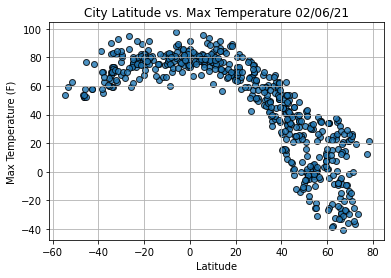

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

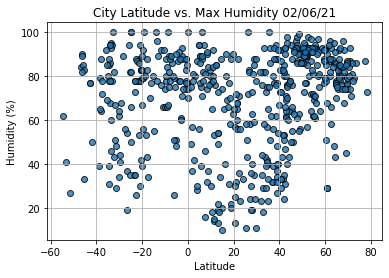

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

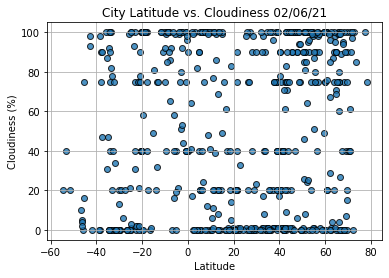

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

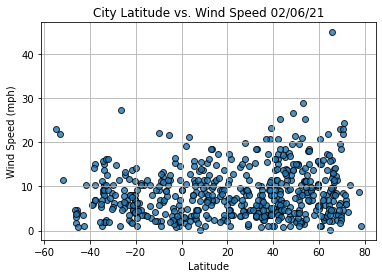

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2021-02-06 19:01:55
Lat                      -21.2078
Lng                      -159.775
Max Temp                     82.4
Humidity                       78
Cloudiness                     21
Wind Speed                   8.05
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Northam,GB,2021-02-06 19:04:41,51.0333,-4.2167,39.99,94,81,4.00
1,Torbay,CA,2021-02-06 19:02:12,47.6666,-52.7314,35.60,87,90,11.50
2,Chokurdakh,RU,2021-02-06 19:02:06,70.6333,147.9167,-20.16,87,61,8.48
4,Dongling,CN,2021-02-06 19:04:42,41.8144,123.5758,12.20,85,0,4.47
5,Lasa,IT,2021-02-06 19:04:42,46.6166,10.7002,39.99,93,40,9.22


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

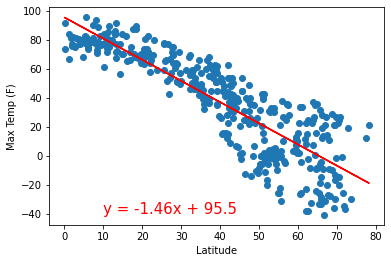

In [60]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp (F)", (10,-40))

In [62]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.78x + 65.41
The p-value is: 0.000


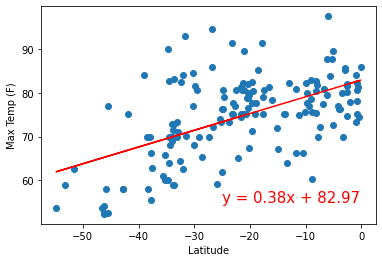

In [50]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature','Max Temp (F)',(-25,55))

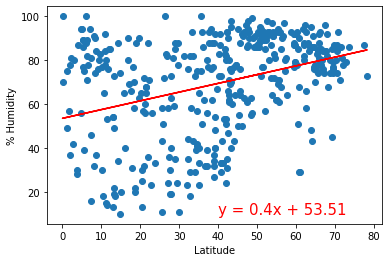

In [51]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

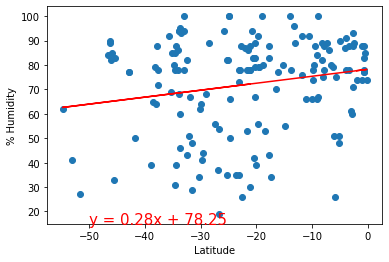

In [55]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

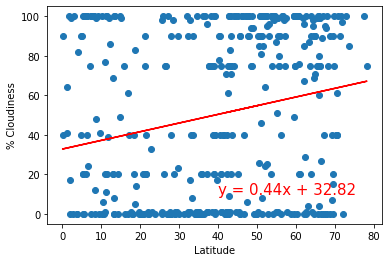

In [56]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

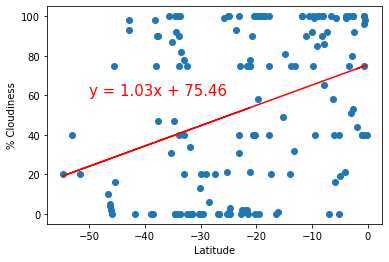

In [58]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

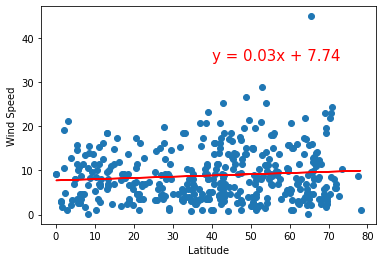

In [64]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

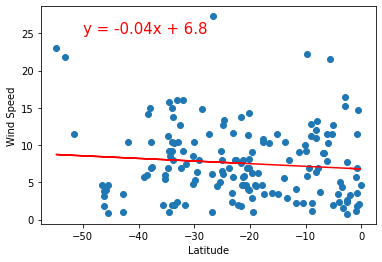

In [66]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))